# Downloading Images using the Pexels API

For many image processing problems, one needs to create a dataset of images of particular classes.  The [ImageNet site](http://www.image-net.org/) has an enormous set of images of 1000 different classes with bounding boxes.  But, this set may not have the exact image classes you are looking for.  An alternative simple way to generate image datasets is via the [Pexels API](https://www.pexels.com/api/), which gives you access to millions of images in the Pexels database.

In this demo, you will learn to:
* Load images from the Pexels API
* Resize images to a desired shape
* Save images to a file

Before you start the following code, you need to go the [Pexels website](https://www.pexels.com/) and create an acccount. Once that is done, you need to log in and create your own API key at [Pexels API](https://www.pexels.com/api/) by submitting a simple form. Once it is approved, you can find your own API key and copy it to the second code block below.

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline

To use the Pexels API, you need to apply for keys (instruction at top of this file). Once you have the keys, copy it here.

In [2]:
import requests

API_KEY = "PUT_YOUR_API_HERE"
headers = {"Authorization": API_KEY}

url = "https://api.pexels.com/v1/search"

Create a directory with the name of the keyword for the images.

In [3]:
keyword = 'dog'
dir_name = 'dog'

import os
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)


Will store images in directory dog


## Loading the Images
The `requests.get()` function provides a generator of URLs for photos with a particular `keyword`.  To illustrate the method, we will get a number of dog images.

In [4]:
params = {"query": keyword, "per_page": 100, "page": 1}

resp = requests.get(url, headers=headers, params=params).json()

Next, we create a routine for displaying images.

In [5]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

Now, we walk through the images and save the files.

In [6]:
import warnings
    
nimage = 10
i = 0
nrow = 224
ncol = 224

#If you get an error here, please check if you have replaced your API key
for photo in resp["photos"]:
    #print(photo)
    url=photo["src"]["large"]
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Save the image
        local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_name,keyword, i)  
        skimage.io.imsave(local_name, im2)      
        print(local_name)
        i = i + 1        
    if (i >= nimage):        
        break        

dog/dog_0000.jpg
dog/dog_0001.jpg
dog/dog_0002.jpg
dog/dog_0003.jpg
dog/dog_0004.jpg
dog/dog_0005.jpg
dog/dog_0006.jpg
dog/dog_0007.jpg
dog/dog_0008.jpg
dog/dog_0009.jpg


We plot some of the loaded images.  Some of them may be slightly distorted since the re-shaping could have changed the aspect ratio.

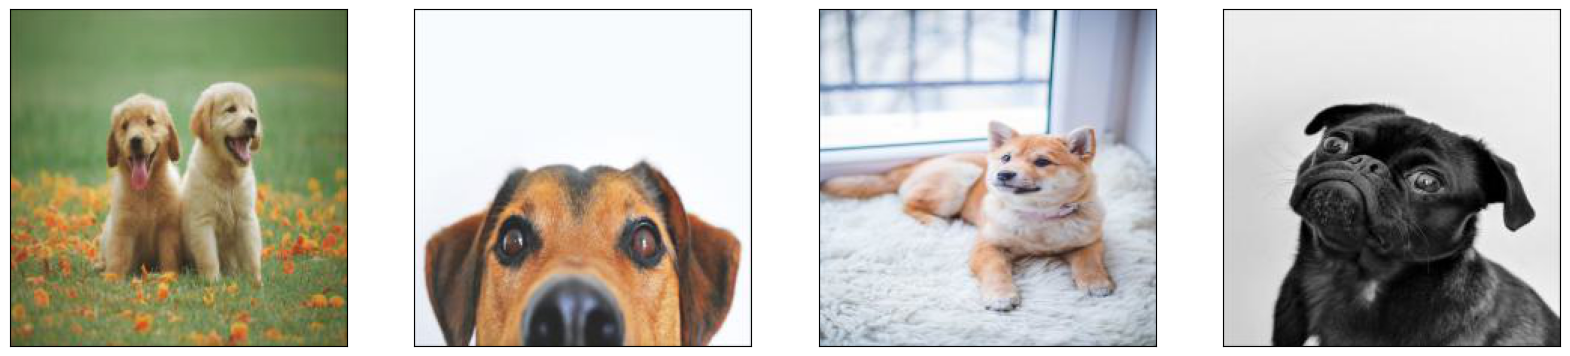

In [7]:
plt.figure(figsize=(20,20))
nplot = 4
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(keyword,keyword, i)  
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)